# Project 4: Concepts of Large Eddy Simulation

In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import Image

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



<p class='alert alert-success'>
Solve the questions in green blocks. Save the file as ME249-Lecture-3-YOURNAME.ipynb and change YOURNAME in the bottom cell. Send me and the grader the <b>html</b> file not the ipynb file. 
</p>

<h1>Discrete Fourier Series</h1>

Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The longest wavelength wave that can be contained in the domain is $L_x$. A phyiscal understanding of Fourier series is the representation of a system as the sum of many waves fo wavelengths smaller or equal to $L_x$. In a discrete sense, the series of wave used to decompose the system is defined as:
$$
a_n\exp\left(\hat{\jmath}\frac{2\pi n}{Lx}\right)
$$
such that
<p class='alert alert-danger'>
$$
f(x) = \sum_{n=-\infty}^{\infty}a_n\exp\left(\hat{\jmath}\frac{2\pi nx}{Lx}\right)
$$
</p>
and 
<p class='alert alert-danger'>
$$
a_n = \frac{1}{L_x}\int_Lf(x)\exp\left(-\hat{\jmath}\frac{2\pi nx}{Lx}\right)dx
$$
</p>
Here $\hat{\jmath}^2=-1$.Often the reduction to wavenumber is used, where
<p class='alert alert-danger'>
$$
k_n = \frac{2\pi n}{L_x}
$$
</p>
Note that if $x$ is time instead of distance, $L_x$ is a time $T$ and the smallest frequency contained in the domain is $f_0=1/T_0$ and the wavenumber $n$ is $k_n=2\pi f_0n=2\pi f_n$ with $f_n$ for $\vert n\vert >1$ are the higher frequencies. 


<h1>Discrete Fourier Transform (DFT)</h1>

In scientific computing we are interested in applying Fourier series on vectors or matrices, containing a integer number of samples. The DFT is the fourier series for the number of samples. DFT functions available in python or any other language only care about the number of samples, therefore the wavenumber is 
<p class='alert alert-danger'>
$$
k_n=\frac{2\pi n}{N_x}
$$
</p>
Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The nodal value is $f_i$ located at $x_i=(i+1)\Delta x$ with $\Delta x=L_x/Nx$. The DFT is defined as
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=0}^{N_x-1}f_i\exp\left(-2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>
The inverse DFT is defined as
<p class='alert alert-danger'>
$$
f_i=\sum_{k=0}^{N_x-1}\hat{f}_k\exp\left(2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>

<h1>Fast Fourier Transform (FFT)</h1>
Using symmetries, the FFT reduces computational costs and stores in the following way:
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=-Nx/2+1}^{N_x/2}f_i\exp\left(-2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>
<p class='alert alert-info'>
Compared to the Fourier series, DFT or FFT assumes that the system can be accurately captured by a finite number of waves. It is up to the user to ensure that the number of computational points is sufficient to capture the smallest scale, or smallest wavelength or highest frequence. Remember that the function on which FT is applied must be periodic over the domain and the grid spacing must be uniform.
</p>
There are FT algorithms for unevenly space data, but this is beyond the scope of this notebook.


<h1>Filtering</h1>

The following provides examples of low- and high-pass filters based on Fourier transform. A ideal low-(high-) pass filter passes frequencies that are lower than a threshold without attenuation and removes frequencies that are higher than the threshold. 

When applied to spatial data (function of $x$ rather than $t$-time), the FT (Fourier Transform) of a variable is function of wavenumbers
$$
k_n=\frac{2\pi n}{L_x}
$$
or wavelengths
$$
\lambda_n=\frac{2\pi}{k_n}
$$

The test function is defined as sum of $N_{wave}$ cosine function:
$$
u(x)=\sum_{n=0}^{N_{wave}}A_n\cos\left(nx+\phi_n\right)
$$
with the following first and second derivatives:
$$
\frac{du}{dx}=\sum_{n=1}^{N_{wave}}-nA_n\sin\left(nx+\phi_n\right)
$$
$$
\frac{d^2u}{dx^2}=\sum_{n=1}^{N_{wave}}-n^2A_n\cos\left(nx+\phi_n\right)
$$
The python code for function u and its derivatives is written below. Here amplitudes $A_n$ and phases $\phi_n$ are chosen randomly of ranges $[0,1]$ and $[0,2\pi]$, respectively.

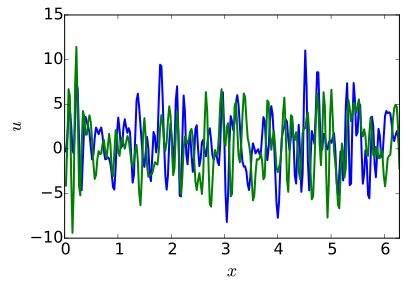

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Lx = 2.*np.pi
Nx = 256
u = np.zeros((2,Nx),dtype='float64')
du = np.zeros((2,Nx),dtype='float64')
ddu = np.zeros((2,Nx),dtype='float64')
k_0 = 2.*np.pi/Lx 
x = np.linspace(Lx/Nx,Lx,Nx)
Nwave = 60
uwave = np.zeros((2,Nx,Nwave),dtype='float64')
duwave = np.zeros((2,Nx,Nwave),dtype='float64')
dduwave = np.zeros((2,Nx,Nwave),dtype='float64')
ampwave = np.random.random((2,Nwave))
ampdamp = np.zeros(Nx)
kwave = np.zeros(Nx)
for i in range (Nx):
    kwave[i] = k_0*i
    if i == 0.:
        ampdamp[i] = 1.
    else:
        ampdamp[i] = kwave[i]**(-5./6.)
ampdamp[:] = 1.
phasewave = np.random.random((2,Nwave))*2*np.pi
for i in range(2):
    for iwave in range(Nwave):
        uwave[i,:,iwave] = ampdamp[iwave]*ampwave[i,iwave]*np.cos(k_0*iwave*x+phasewave[i,iwave])
        duwave[i,:,iwave] = -k_0*iwave*ampdamp[iwave]*ampwave[i,iwave]*np.sin(k_0*iwave*x+phasewave[i,iwave])
        dduwave[i,:,iwave] = -(k_0*iwave)**2*ampdamp[iwave]*ampwave[i,iwave]*np.cos(k_0*iwave*x+phasewave[i,iwave])
u = np.sum(uwave,axis=2)
du = np.sum(duwave,axis=2)
ddu = np.sum(dduwave,axis=2)
#print(u)
plt.plot(x,u[0,:],lw=2)
plt.plot(x,u[1,:],lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()


First, let's perform a sanity check, i.e.
$$
u=FT^{-1}\left[FT\left[u\right]\right]
$$
where $FT$ designates the Fourier transform and $FT^{-1}$ its inverse.

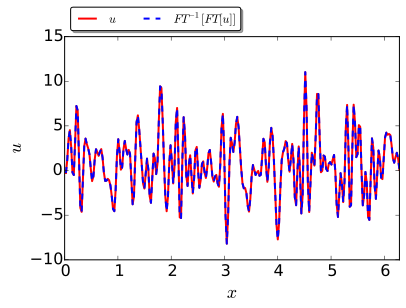

('error', 829.93728868523658)


In [3]:
#check FT^-1(FT(u)) - Sanity check
u_hat = np.fft.fft(u[0,:])
v = np.real(np.fft.ifft(u_hat))
plt.plot(x,u[0,:],'r-',lw=2,label='$u$')
plt.plot(x,v,'b--',lw=2,label='$FT^{-1}[FT[u]]$')
plt.xlim(0,Lx)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
print('error',np.linalg.norm(u-v,np.inf))


<h2>Spectrum</h2>

For now we will define the spectrum $\Phi_u$ as
<p class='alert alert-danger'>
$$
\Phi_u(k_n) = \hat{u}_n.\hat{u}_n^* 
$$
</p>
which can be interpreted as the energy contained in the $k_n$ wavenumber. This is helpful when searching for the most energetic scales or waves in our system. Thanks to the symmetries of the FFT, the spectrum is defined over $n=0$ to $N_x/2$

<h2>Low-Pass Filter</h2>

The following code filters the original signal by half the wavenumbers using FFT and compares to exact filtered function

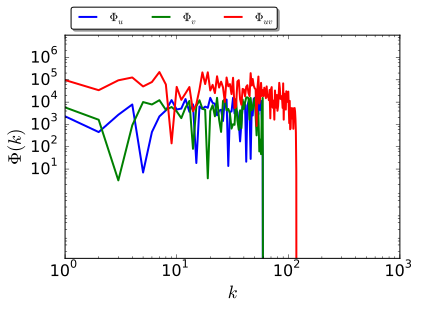

In [4]:
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0))) #This is how the FFT stores the wavenumbers
uv = u[0,:]*u[1,:]
u_hat = np.fft.fft(u[0,:])
v_hat = np.fft.fft(u[1,:])
uv_hat_wrong = u_hat*v_hat
uv_hat = np.fft.fft(uv)
F = np.zeros((4,Nx/2+1),dtype='float64')
F[0,:] = np.real(u_hat[0:Nx/2+1]*np.conj(u_hat[0:Nx/2+1]))
F[1,:] = np.real(v_hat[0:Nx/2+1]*np.conj(v_hat[0:Nx/2+1]))
F[2,:] = np.real(uv_hat[0:Nx/2+1]*np.conj(uv_hat[0:Nx/2+1]))
F[3,:] = np.real(uv_hat_wrong[0:Nx/2+1]*np.conj(uv_hat_wrong[0:Nx/2+1]))

plt.loglog(k[0:Nx/2+1],F[0,:],'b-',lw=2,label='$\Phi_u$')
plt.loglog(k[0:Nx/2+1],F[1,:],'g-',lw=2,label='$\Phi_v$')
plt.loglog(k[0:Nx/2+1],F[2,:],'r-',lw=2,label='$\Phi_{uv}$')
#plt.loglog(k[0:Nx/2+1],F[3,:],'k-',lw=2,label='$\Phi_{uv}$ (wrong)')
#plt.xlim(24,70)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$\Phi(k)$', fontdict = font)
plt.xticks(fontsize = 16)
y_ticks = np.logspace(1,6,6)
plt.ylim(1e-3,1e7)
plt.yticks(y_ticks,fontsize = 16) #Specify ticks, necessary when increasing font
plt.show()

In [62]:
Int_u = np.trapz(F[0,0:Nx/2+1],k[0:Nx/2+1])
print(Int_u)
print(np.var(u[0,:]))
print(Int_u/np.var(u[0,:]))

366215.722659
11.1397581759
32874.6564223


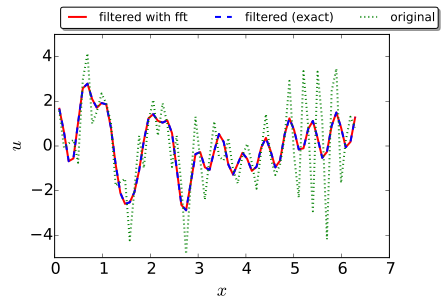

('error:', 1.4210854715202004e-14)


In [13]:
# filtering the smaller waves
def low_pass_filter_fourier(a,k,kcutoff):
    N = a.shape[0]
    a_hat = np.fft.fft(a)
    filter_mask = np.where(np.abs(k) > kcut)
    a_hat[filter_mask] = 0.0 + 0.0j
    a_filter = np.real(np.fft.ifft(a_hat))
    return a_filter
kcut=Nwave/2+1
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
v = low_pass_filter_fourier(u,k,kcut)
u_filter_exact = np.sum(uwave[:,0:kcut+1],axis=1)
plt.plot(x,v,'r-',lw=2,label='filtered with fft')
plt.plot(x,u_filter_exact,'b--',lw=2,label='filtered (exact)')
plt.plot(x,u,'g:',lw=2,label='original')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
print('error:',np.linalg.norm(v-u_filter_exact,np.inf))

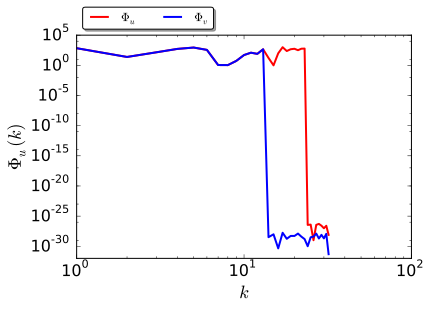

In [14]:
F = np.zeros(Nx/2+1,dtype='float64')
F_filter = np.zeros(Nx/2+1,dtype='float64')
u_hat = np.fft.fft(u)
F = np.real(u_hat[0:Nx/2+1]*np.conj(u_hat[0:Nx/2+1]))
v_hat = np.fft.fft(v)
F_filter = np.real(v_hat[0:Nx/2+1]*np.conj(v_hat[0:Nx/2+1]))
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
plt.loglog(k[0:Nx/2+1],F,'r-',lw=2,label='$\Phi_u$')
plt.loglog(k[0:Nx/2+1],F_filter,'b-',lw=2,label='$\Phi_v$')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$\Phi_u(k)$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(y_ticks,fontsize = 16)
plt.show()

<h2> High-Pass Filter</h2>
<p class='alert alert-success'>
From the example below, develop a function for a high-pass filter.
</p>

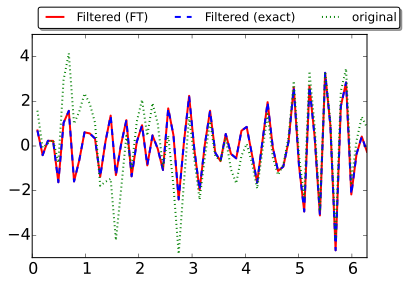

In [15]:
u_hat = np.fft.fft(u)
kfilter = Nwave/2
k = np.linspace(0,Nx-1,Nx)
filter_mask = np.where((k < kfilter) | (k > Nx-kfilter) )
u_hat[filter_mask] = 0.+0.j
v = np.real(np.fft.ifft(u_hat))
plt.plot(x,v,'r-',lw=2,label='Filtered (FT)')
plt.plot(x,np.sum(uwave[:,kfilter:Nwave+1],axis=1),'b--',lw=2,label='Filtered (exact)')
plt.plot(x,u,'g:',lw=2,label='original')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,Lx)
plt.show()

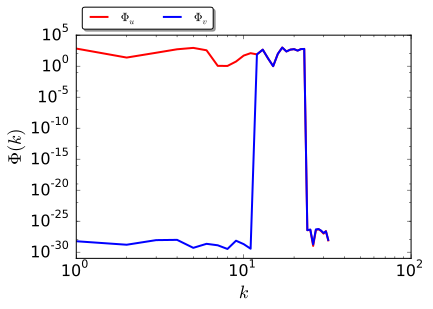

In [17]:
F = np.zeros(Nx/2+1,dtype='float64')
F_filter = np.zeros(Nx/2+1,dtype='float64')
u_hat = np.fft.fft(u)
F = np.real(u_hat[0:Nx/2+1]*np.conj(u_hat[0:Nx/2+1]))
v_hat = np.fft.fft(v)
F_filter = np.real(v_hat[0:Nx/2+1]*np.conj(v_hat[0:Nx/2+1]))
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
plt.loglog(k[0:Nx/2+1],F,'r-',lw=2,label=r'$\Phi_u$')
plt.loglog(k[0:Nx/2+1],F_filter,'b-',lw=2,label=r'$\Phi_v$')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$\Phi(k)$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(y_ticks,fontsize = 16)
plt.show()

<h1>Derivation in Fourier Space</h1>

Going back to the Fourier series,
$$
u(x) = \sum_{n=-\infty}^{\infty}a_n\exp\left(\hat{\jmath}\frac{2\pi nx}{L_x}\right)=\sum_{n=-\infty}^{\infty}a_n\exp\left(\hat{\jmath}k_nx\right)
$$
with 
$$
k_n=\frac{2\pi n}{L_x}\,
$$
it is obvious that any $m$ derivative of the real variable $u$ be:
$$
\frac{d^mu}{dx^m} = \sum_{n=-\infty}^{\infty}\left(\hat{\jmath}k_n\right)^ma_n\exp\left(\hat{\jmath}k_nx\right)
$$
In other words, if $u_n$ is defined as:
$$
u_n(x) = a_n\exp\left(\hat{\jmath}k_nx\right)
$$
then
$$
\frac{d^mu_n}{dx^m} = \left(\hat{\jmath}k_n\right)^m u_n\,.
$$
A $m$ derivativation in the Fourier space amounts to the multiplication of each Fourier coefficient $a_n$ by $\left(\hat{\jmath}k_n\right)^m$.

The following is a code for the first derivative of $u$:

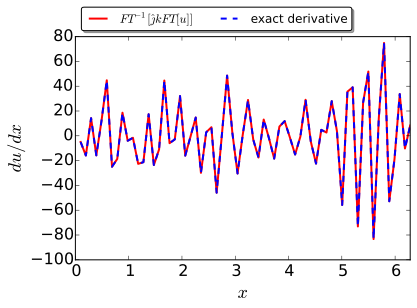

('error:', 1.9049033632281904e-12)


In [18]:
u_hat = np.fft.fft(u)
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
ik = 1j*k
v_hat = ik*u_hat

v = np.real(np.fft.ifft(v_hat))
plt.plot(x,v,'r-',lw=2,label='$FT^{-1}[\hat{\jmath}kFT[u]]$')
plt.plot(x,du,'b--',lw=2,label='exact derivative')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.ylabel('$du/dx$',fontsize = 18)
plt.xlabel('$x$',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,Lx)
plt.show()
print('error:',np.linalg.norm(v-du))

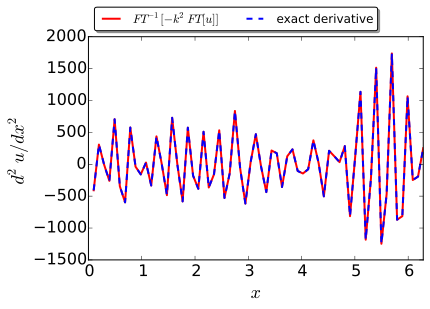

('error:', 1.9369577433743449e-11)


In [19]:
mk2 = ik*ik
v_hat = mk2*u_hat

v = np.real(np.fft.ifft(v_hat))
plt.plot(x,v,'r-',lw=2,label='$FT^{-1}[-k^2FT[u]]$')
plt.plot(x,ddu,'b--',lw=2,label='exact derivative')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.ylabel('$d^2u/dx^2$',fontsize = 18)
plt.xlabel('$x$',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,Lx)
plt.show()
print('error:',np.linalg.norm(v-ddu))

<h1> Comparison with Finite Difference Derivatives</h1>

When the number of Fourier node is sufficient to capture all scales, derivatives computed in the Fourier space are essentially exact. The following code compares the exact first derivative with a first order upwind scheme:
$$
\left.\frac{\delta u}{\delta x}\right\vert_i=\frac{u_i-u_{i-1}}{\Delta x}
$$

For finite difference derivative, we will use the symbol $\delta/\delta x$ rather than $d/dx$.

<p class='alert alert-success'>
Show that the scheme is first order and write the leading term in the truncation error.
</p>

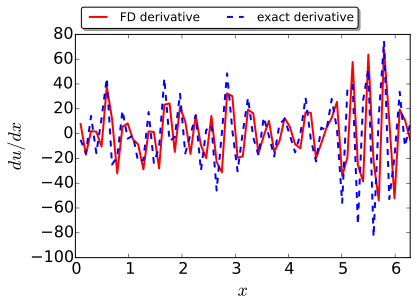

('error:', 68.161532861412965)


In [20]:
du_fd = np.zeros(Nx,dtype='float64')
dx = Lx/Nx
du_fd[1:Nx] = (u[1:Nx]-u[0:Nx-1])/dx
du_fd[0] = (u[0]-u[Nx-1])/dx
plt.plot(x,du_fd,'r-',lw=2,label='FD derivative')
plt.plot(x,du,'b--',lw=2,label='exact derivative')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.ylabel('$du/dx$',fontsize = 18)
plt.xlabel('$x$',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,Lx)
plt.show()
print('error:',np.linalg.norm(du_fd-du,np.inf))

The error is large which is compounded by the fact that <FONT FACE="courier" style="color:blue">np.linalg.norm</FONT> does not normalize the norm by the number of points. Nonetheless the error is far greater than for the derivative using the Fourier space. To shed some light on the cause for errors, the following code computes the spectrum of the first derivative. The second graph shows the difference in spectral energy between the exact solution and the derivative approximated with finite difference per wavenumber.
<p class='alert alert-info'>
However the best way to visualize the problem with spectra alone is to lower the resolution at the top cell and rerun the whole notebook. Finish the notebook as is and then rerun with $N_x=64$.
</p>

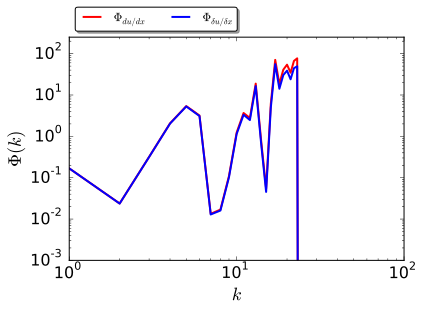

('error:', 0.34300242265904846)
error per wavenumber


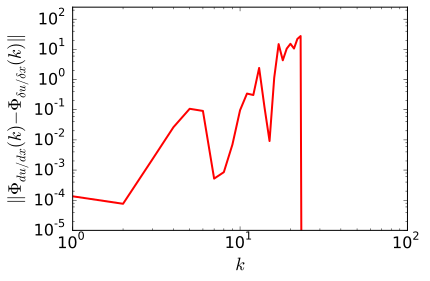

In [23]:
F = np.zeros(Nx/2+1,dtype='float64')
F_fd = np.zeros(Nx/2+1,dtype='float64')
du_hat = np.fft.fft(du)/Nx
F = np.real(du_hat[0:Nx/2+1]*np.conj(du_hat[0:Nx/2+1]))
dv_hat = np.fft.fft(du_fd)/Nx
F_fd = np.real(dv_hat[0:Nx/2+1]*np.conj(dv_hat[0:Nx/2+1]))
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
plt.loglog(k[0:Nx/2+1],F,'r-',lw=2,label='$\Phi_{du/dx}$')
plt.loglog(k[0:Nx/2+1],F_fd,'b-',lw=2,label='$\Phi_{\delta u/\delta x}$')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$\Phi(k)$', fontdict = font)
plt.xticks(fontsize = 16)
plt.ylim(1e-3,250)
plt.yticks(fontsize = 16)
plt.show()
print('error:',np.linalg.norm(F[0:Nwave/2]-F_fd[0:Nwave/2],np.inf))
print('error per wavenumber')
plt.loglog(k[0:Nx/2+1],np.abs(F-F_fd),'r-',lw=2)
plt.xlabel('$k$', fontdict = font)
plt.ylabel('$\Vert\Phi_{d u/d x}(k)-\Phi_{\delta u/\delta x}(k)\Vert$', fontdict = font)
plt.xticks(fontsize = 16)
plt.ylim(1e-5,250)
plt.yticks(fontsize = 16)
plt.show()

<p class='alert alert-success'>
Which scales are the most affected by the finite difference scheme? What effect do you observe?
</p>

<h1>Modified Wavenumber</h1>

Starting from,
$$
f(x) = \sum_{k=-N/2+1}^{N/2}\hat{f}_k\exp\left(\hat{\jmath}\frac{2\pi kx}{L_x}\right)
$$
and introducing the wavenumber
$$
\omega = \frac{2\pi k}{L_x}
$$
allows to reduce the Fourier expansion to
$$
f(x) = \sum_{\omega=-\pi}^{\pi}\hat{f}_\omega e^{\hat{\jmath}\omega x}
$$
The derivative of $f$ becomes
$$
f'(x) = \sum_{\omega=-\pi}^{\pi}\hat{f'}_\omega e^{\hat{\jmath}\omega x}
$$
where $\hat{f'}_\omega$ is only a notation, not the derivative of the Fourier coefficient:
$$
\hat{f'}_\omega=\hat{\jmath}\omega\hat{f}_\omega
$$
Considering the symmetry of the FT, we restrict the study to $\omega\Delta x\in[0,\pi]$. 

Now we want to express the first order finite difference scheme in terms of Fourier coefficients and wavenumbers. The scaled coordinates expression of the scheme is
$$
\frac{\delta f}{\delta x}=\frac{f(x)-f(x-\Delta x)}{\Delta x}=\sum_{\omega=-\pi}^{\pi}\hat{f}_\omega\frac{e^{\hat{\jmath}\omega x}-e^{\hat{\jmath}\omega (x-\Delta x)}}{\Delta x}=\sum_{\omega=-\pi}^{\pi}\frac{1-e^{-\hat{\jmath}\omega\Delta x}}{\Delta x}\hat{f}_\omega e^{\hat{\jmath}\omega x}
$$
We now define a modified wavenumber for the first order upwind scheme:
$$
\hat{\jmath}\omega'=\frac{1-e^{-\hat{\jmath}\omega\Delta x}}{\Delta x}=\frac{1-\cos(-\omega\Delta x)-\hat{\jmath}\sin(-\omega\Delta x)}{\Delta x}
$$
which reduces to
$$
\hat{\jmath}\omega_\text{mod}\Delta x= \hat{\jmath}\sin(\omega\Delta x)+\left(\cos(1-\omega\Delta x)\right)
$$
The modified wavenumber is no longer purely imaginary, and even the imaginary part is far from the exact wavenumber, as shown in the following plot.

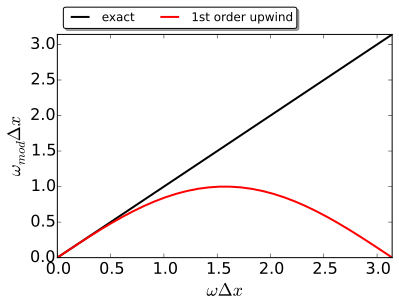

In [24]:
L = np.pi
N = 32
dx = L/N
omega = np.linspace(0,L,N)
omegap_exact = omega
omegap_modified = np.sin(omega)
plt.plot(omega,omegap_exact,'k-',lw=2,label='exact')
plt.plot(omega,omegap_modified,'r-',lw=2,label='1st order upwind')
plt.xlim(0,L)
plt.ylim(0,L)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$\omega\Delta x$', fontdict = font)
plt.ylabel('$\omega_{mod}\Delta x$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

First, let's verify that the derivation of the modified wavenumber is correct.

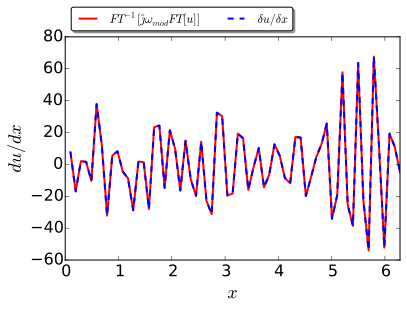

('error:', 3.907985046680551e-14)


In [25]:
u_hat = np.fft.fft(u)
k = np.hstack((np.arange(0,Nx/2+1),np.arange(-Nx/2+1,0)))
dx = Lx/Nx
ikm = 1j*np.sin(2.*np.pi/Nx*k)/dx+(1-np.cos(2.*np.pi/Nx*k))/dx
v_hat = ikm*u_hat
dum = np.real(np.fft.ifft(v_hat))
plt.plot(x,dum,'r-',lw=2,label='$FT^{-1}[\hat{\jmath}\omega_{mod}FT[u]]$')
plt.plot(x,du_fd,'b--',lw=2,label='$\delta u/\delta x$')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.ylabel('$du/dx$',fontsize = 18)
plt.xlabel('$x$',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,Lx)
plt.show()
print('error:',np.linalg.norm(du_fd-dum,np.inf))

<p class='alert alert-success'>
- Explain why $\omega\Delta x$ can be defined from $0$ to $\pi$.
</p>

<p class='alert alert-success'>
- Write a code to illustrate the effects of the imaginary part and real part on the derivative on the following function 
$$ 
f(x) = cos(nx)
$$ 
defined for $x\in[0,2\pi]$, discretized with $N$ points. Study a few $n$, ranging from large scales to small scales. Note the two effects we seek to identify are phase change and amplitude change.
</p>

<p class='alert alert-success'>
- Derive the modified wavenumber for the second order central finite difference scheme
$$
\frac{\delta f}{\delta x}=\frac{f_{i+1}-f_{i-1}}{2\Delta x}
$$
</p>

<p class='alert alert-success'>
- Create a second order upwind scheme and derive the modified wavenumber. Compare the performance of the first order and the second order schemes. For the second order upwind scheme, find $a$, $b$ and $c$ such that
$$
\frac{\delta f}{\delta x}=\frac{af_{i-2}+bf_{i-1}+cf_i}{\Delta x}
$$
</p>

In [ ]:
!ipython nbconvert --to html ME249-Lecture-3-YOURNAME.ipynb